In [2]:


import cv2 

img = cv2.imread('/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara')
#print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [3]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
#from google.colab import drive
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [5]:
dirname = os.path.join(os.getcwd(),'/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara\
c:/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara\jessica 1
c:/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara\jorge 6145
c:/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara\karla 5413
c:/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara\rodrigo 5114
c:/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara\william 5278
Directorios leidos: 5
Imagenes en cada directorio [6146, 5413, 5114, 5278, 4691]
suma Total de imagenes en subdirs: 26642


# Creamos las etiquetas

In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  26642


In [7]:
caras=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    caras.append(name[len(name)-1])
    indice=indice+1

0 jessica
1 jorge
2 karla
3 rodrigo
4 william


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (21313, 28, 28, 3) (21313,)
Testing data shape :  (5329, 28, 28, 3) (5329,)


Text(0.5, 1.0, 'Ground Truth : 3')

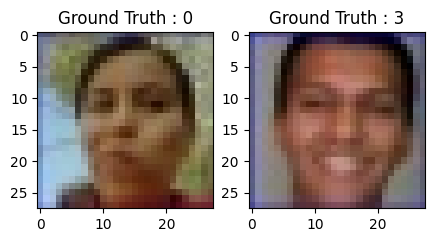

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

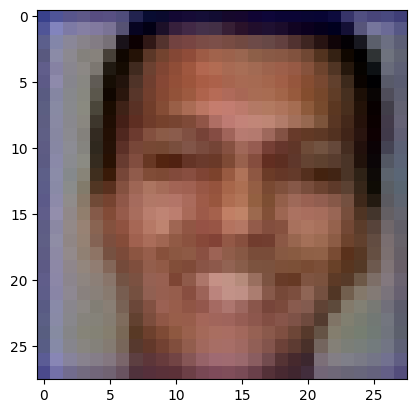

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(17050, 28, 28, 3) (4263, 28, 28, 3) (17050, 5) (4263, 5)


# Creamos el modelo de CNN

In [15]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [16]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [17]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                        

In [18]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [19]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
267/267 [==============================] - 26s 84ms/step - loss: 1.5949 - accuracy: 0.2465 - val_loss: 1.5314 - val_accuracy: 0.3059
Epoch 2/20
267/267 [==============================] - 24s 90ms/step - loss: 1.4906 - accuracy: 0.3653 - val_loss: 1.3574 - val_accuracy: 0.6076
Epoch 3/20
267/267 [==============================] - 24s 90ms/step - loss: 1.3459 - accuracy: 0.4568 - val_loss: 1.1450 - val_accuracy: 0.8060
Epoch 4/20
267/267 [==============================] - 25s 94ms/step - loss: 1.1889 - accuracy: 0.5523 - val_loss: 0.9309 - val_accuracy: 0.8590
Epoch 5/20
267/267 [==============================] - 25s 93ms/step - loss: 1.0401 - accuracy: 0.6229 - val_loss: 0.7519 - val_accuracy: 0.8689
Epoch 6/20
267/267 [==============================] - 25s 93ms/step - loss: 0.9035 - accuracy: 0.6775 - val_loss: 0.6177 - val_accuracy: 0.8853
Epoch 7/20
267/267 [==============================] - 25s 92ms/step - loss: 0.8026 - accuracy: 0.7249 - val_loss: 0.5047 - val_accuracy:

In [20]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("/Users/karla/Documents/inteligencia_artificial/tareas/celulas.h5py")

INFO:tensorflow:Assets written to: /Users/karla/Documents/inteligencia_artificial/tareas/celulas.h5py\assets


INFO:tensorflow:Assets written to: /Users/karla/Documents/inteligencia_artificial/tareas/celulas.h5py\assets


# Evaluamos la red

In [21]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

167/167 [==============================] - 3s 19ms/step - loss: 0.1180 - accuracy: 0.9840


In [22]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11797426640987396
Test accuracy: 0.9840495586395264


In [23]:
sport_train.history

{'loss': [1.5948600769042969,
  1.49056077003479,
  1.3458954095840454,
  1.1888834238052368,
  1.040122628211975,
  0.9035238027572632,
  0.8026131391525269,
  0.7142969369888306,
  0.6495804786682129,
  0.5919259190559387,
  0.5369822382926941,
  0.5014656782150269,
  0.46662071347236633,
  0.43498873710632324,
  0.40377533435821533,
  0.3792197108268738,
  0.36035725474357605,
  0.3327632546424866,
  0.3179711699485779,
  0.3021943271160126],
 'accuracy': [0.24651026725769043,
  0.3653372526168823,
  0.4568328559398651,
  0.5522580742835999,
  0.6229325532913208,
  0.67753666639328,
  0.7248680591583252,
  0.7545454502105713,
  0.7834017872810364,
  0.8053959012031555,
  0.8246334195137024,
  0.8397067189216614,
  0.8543108701705933,
  0.8645161390304565,
  0.8791788816452026,
  0.8863343000411987,
  0.8962463140487671,
  0.9051026105880737,
  0.9085630774497986,
  0.9141349196434021],
 'val_loss': [1.5314255952835083,
  1.3574124574661255,
  1.1450103521347046,
  0.9309295415878296

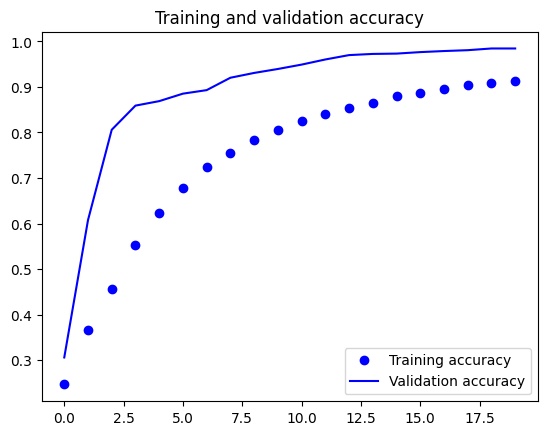

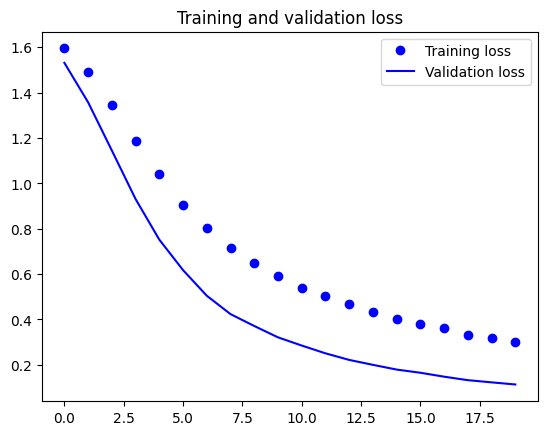

In [24]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
predicted_classes2 = sport_model.predict(test_X)

167/167 [==============================] - 4s 19ms/step


In [28]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [29]:
predicted_classes.shape, test_Y.shape

((5329,), (5329,))

# Aprendamos de los errores: Qué mejorar

Found 4176 correct labels


C:\Users\karla\AppData\Local\Temp\ipykernel_14560\166765134.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


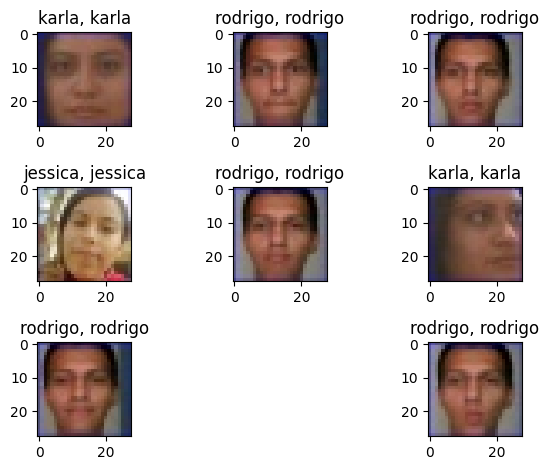

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(caras[predicted_classes[correct]],
                                                    caras[test_Y[correct]]))

    plt.tight_layout()

Found 85 incorrect labels


C:\Users\karla\AppData\Local\Temp\ipykernel_9668\3252689814.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


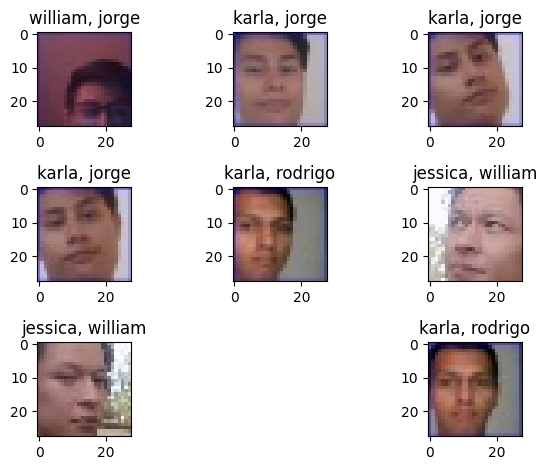

In [30]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(caras[predicted_classes[incorrect]],
                                                    caras[test_Y[incorrect]]))
    plt.tight_layout()

In [31]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99      1250
     Class 1       1.00      0.95      0.98      1044
     Class 2       0.95      1.00      0.97      1029
     Class 3       0.99      0.99      0.99      1058
     Class 4       0.99      0.99      0.99       948

    accuracy                           0.98      5329
   macro avg       0.98      0.98      0.98      5329
weighted avg       0.98      0.98      0.98      5329



In [32]:
import cv2
import numpy as np
import keras
loaded_model = keras.models.load_model("/Users/karla/Documents/inteligencia_artificial/tareas/celulas.h5py")
image = cv2.imread("/Users/karla/Documents/inteligencia_artificial/tareas/datasetcara/rodrigo/roy800.jpg")

print("hola")
cv2.imshow("Imagen", image)
cv2.waitKey(0)


cv2.destroyAllWindows()

print("Calculando...")
#Ajustar la imagen al entrenamiento
image = cv2.resize(image,(28, 28))

#Agregar una dimension adicional para representar el loto de datos
image = np.expand_dims(image, axis = 0)
predictions = loaded_model.predict(image)
predicted_class_index = np.argmax(predictions)

class_name = {
    0: "Jessica",
    1: "Rodrigo",
    2: "William",
    3: "Karla",
   4: "Jorge"
}

#Obtiene el nombre de la clase predicha
predicted_class_name = class_name[predicted_class_index]

#Imprimir el resultado
print("\nLa persona que se muestra en la foto es: ", predicted_class_name)

hola


KeyboardInterrupt: 

In [34]:
from PIL import Image
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

screen_width = 480
screen_height = 260

image_width = 28
image_height = 28

model = load_model('/Users/karla/Documents/inteligencia_artificial/tareas/celulas.h5py')

class_labels = ['jessica', 'rodrigo', 'william', 'karla', 'jorge']

stream = cv2.VideoCapture(0)

while True:
    (grabbed, frame) = stream.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    faces = face_cascade.detectMultiScale(rgb, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_rgb = rgb[y:y + h, x:x + w]

        color = (255, 0, 0)
        stroke = 2
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, stroke)

        # Redimensionar la imagen
        size = (image_width, image_height)
        resized_image = cv2.resize(roi_rgb, size)
        image_array = np.array(resized_image, "uint8")
        img = image_array.reshape(1, image_width, image_height, 3)
        img = img.astype('float32')
        img /= 255

        # Realizar la predicción de la imagen
        predicted_prob = model.predict(img)

        # Obtener la clase predicha
        predicted_class = np.argmax(predicted_prob)
        class_label = class_labels[predicted_class]

        # Mostrar la etiqueta
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (255, 0, 255)
        stroke = 2
        cv2.putText(frame, f'({class_label})', (x, y - 8), font, 1, color, stroke, cv2.LINE_AA)

    cv2.imshow("Image", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

stream.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


1/1 [==============================] - 0s 45ms/step


-1